In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


In [2]:
# Creating a sample dataset
data = {
    'CustomerID': range(1, 11),
    'Annual Income (k$)': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 77, 40, 80]
}

In [4]:
df = pd.DataFrame(data)


In [5]:
# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
# Standardizing the data (optional but recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

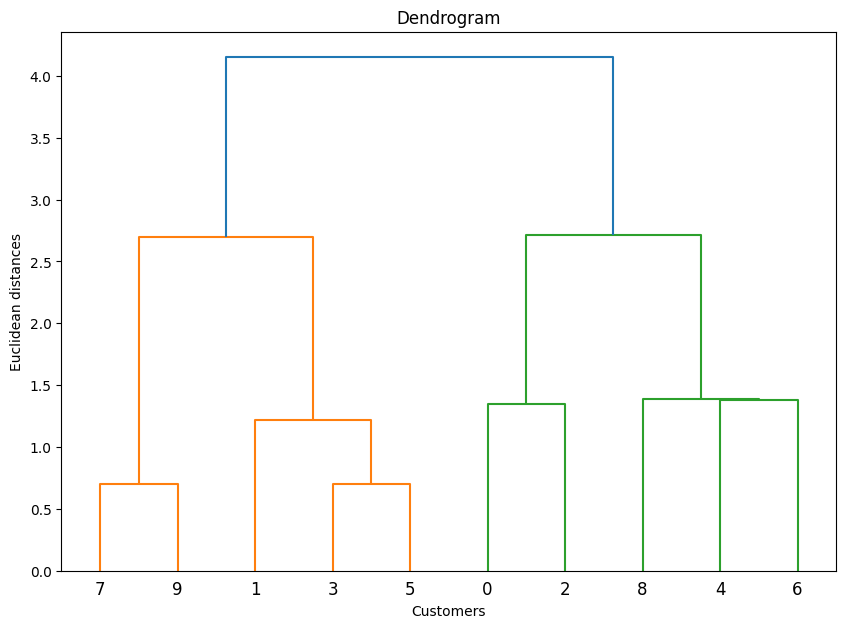

In [7]:
# Step 1: Creating the dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [8]:
# Based on the dendrogram, let's assume we choose 3 clusters

# Step 2: Fitting the hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


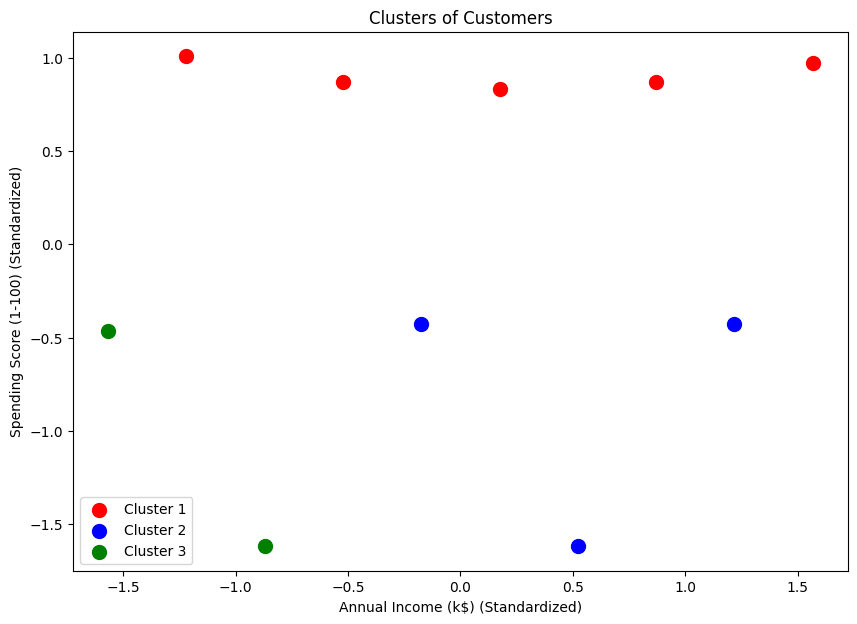

In [9]:
# Step 3: Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$) (Standardized)")
plt.ylabel("Spending Score (1-100) (Standardized)")
plt.legend()
plt.show()

In [10]:
# Step 4: Adding cluster labels to the original data for analysis
df['Cluster'] = y_hc
print(df)

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        2
1           2                  16                      81        0
2           3                  17                       6        2
3           4                  18                      77        0
4           5                  19                      40        1
5           6                  20                      76        0
6           7                  21                       6        1
7           8                  22                      77        0
8           9                  23                      40        1
9          10                  24                      80        0
